In [1]:
import pennylane as qml
from qco_level_0 import *
from qco_level_1 import optimization_level_1
from qco_level_2 import optimization_level_2
from qco_level_3 import optimization_level_3_qiskit
from qco_spec_table import make_spec_table, show_circuit

In [2]:
[ds] = qml.data.load("ketgpt")

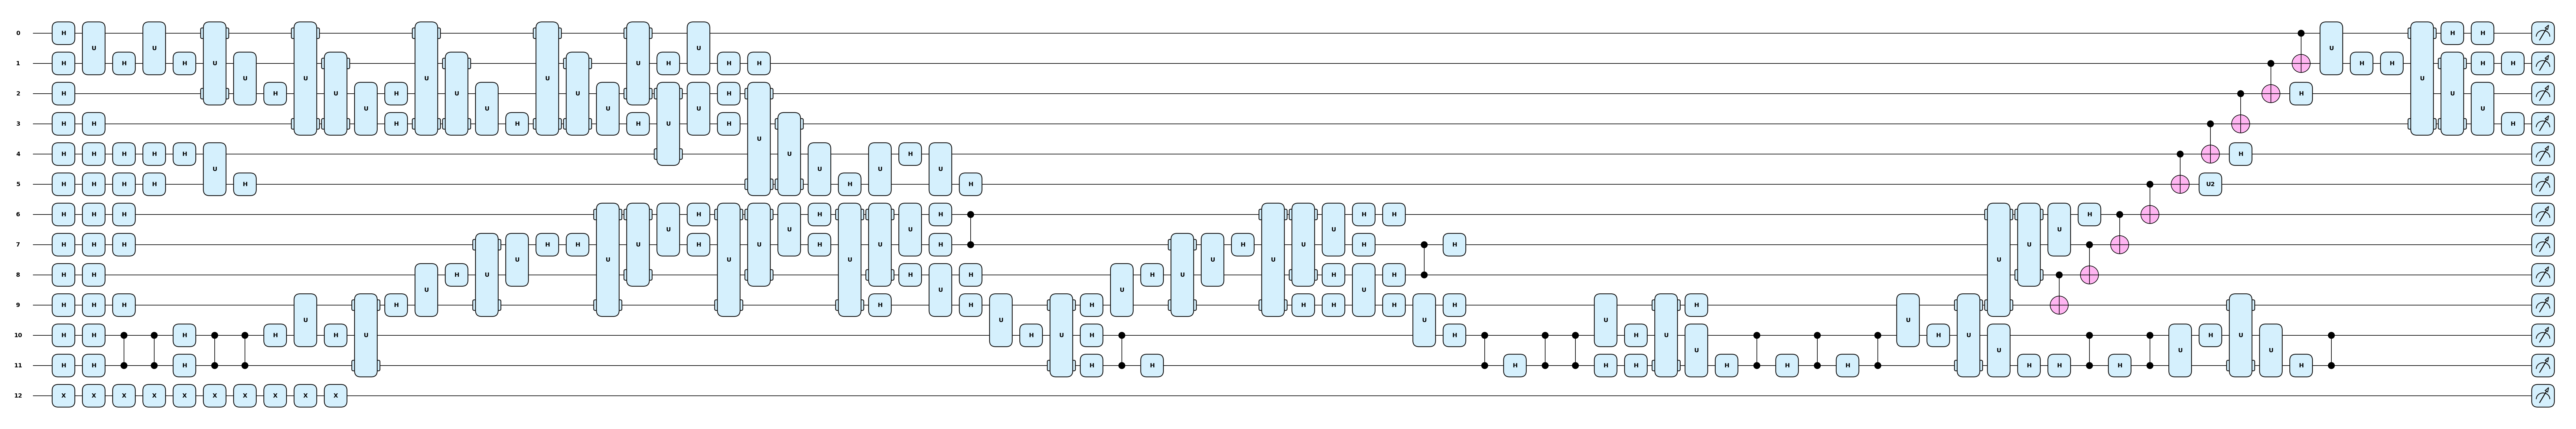

In [3]:
seed = 0

@qml.qnode(qml.device('default.qubit'))
def circuit(): # 0 to 99
    for op in ds.circuits[seed]:
        qml.apply(op)
    return qml.state()

show_circuit(circuit)

          original  qiskit_0  qiskit_1  penny  mine
qubits          13        13        13     12    12
gates          205       205       145    147   153
1q gates       116       116        62     64    64
2q gates        25        25        19     19    25
unitary         64        64        64     64    64
depth           72        72        59     60    67
None


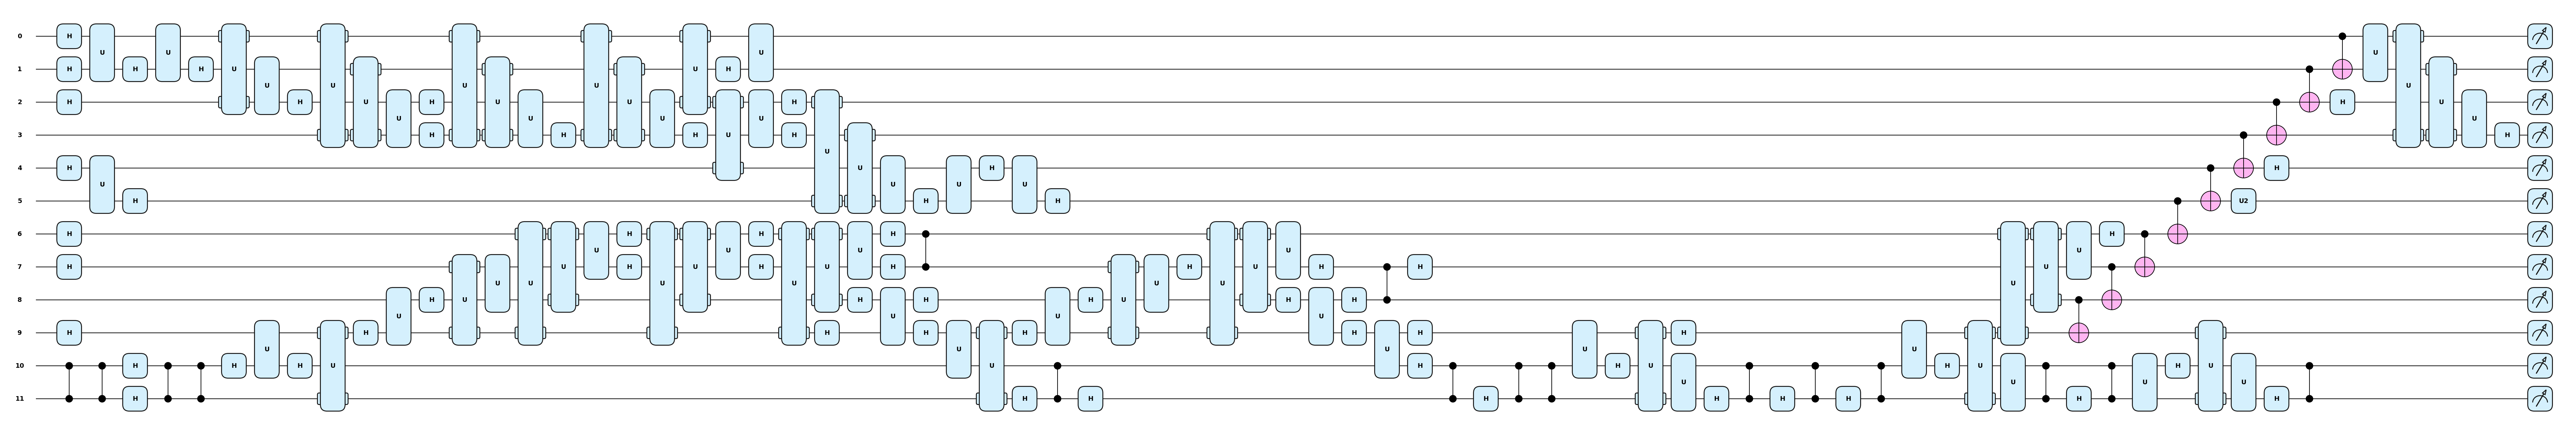

In [4]:
qnode_q1 = optimization_level_1(circuit)

          original  qiskit_0  qiskit_1  penny  mine
qubits          12        12        12     12    12
gates          153       153       145    147   147
1q gates        64        64        62     64    64
2q gates        25        25        19     19    19
unitary         64        64        64     64    64
depth           67        67        59     60    60
None


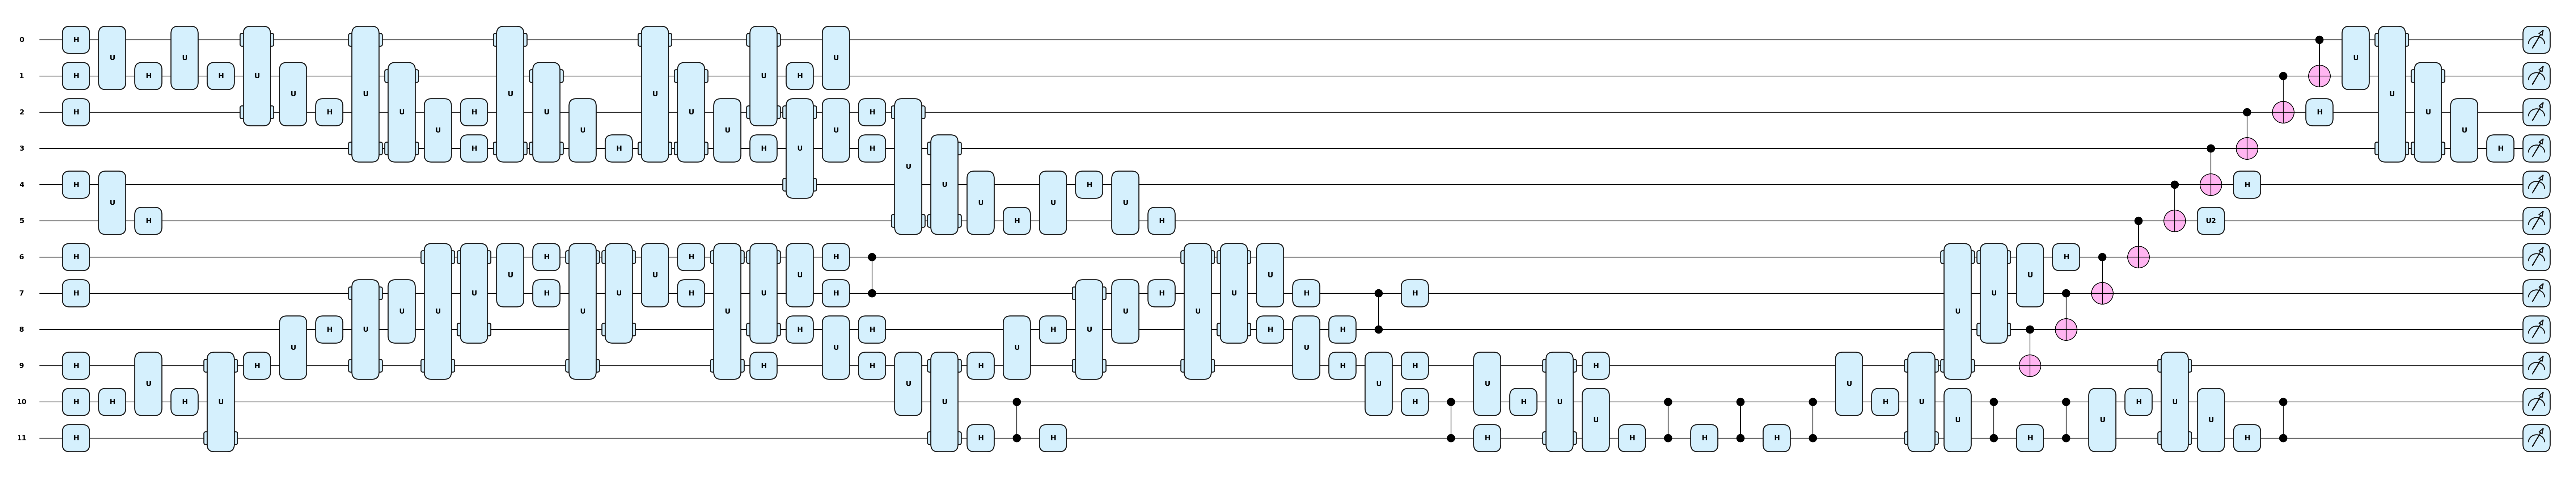

In [5]:
qnode_q2 = optimization_level_2(qnode_q1)

          original  qiskit_0  qiskit_1  penny  mine
qubits          12        12        12     12    12
gates          153       153       145    147   127
1q gates        64        64        62     64    56
2q gates        25        25        19     19     7
unitary         64        64        64     64    64
depth           67        67        59     60    47
None


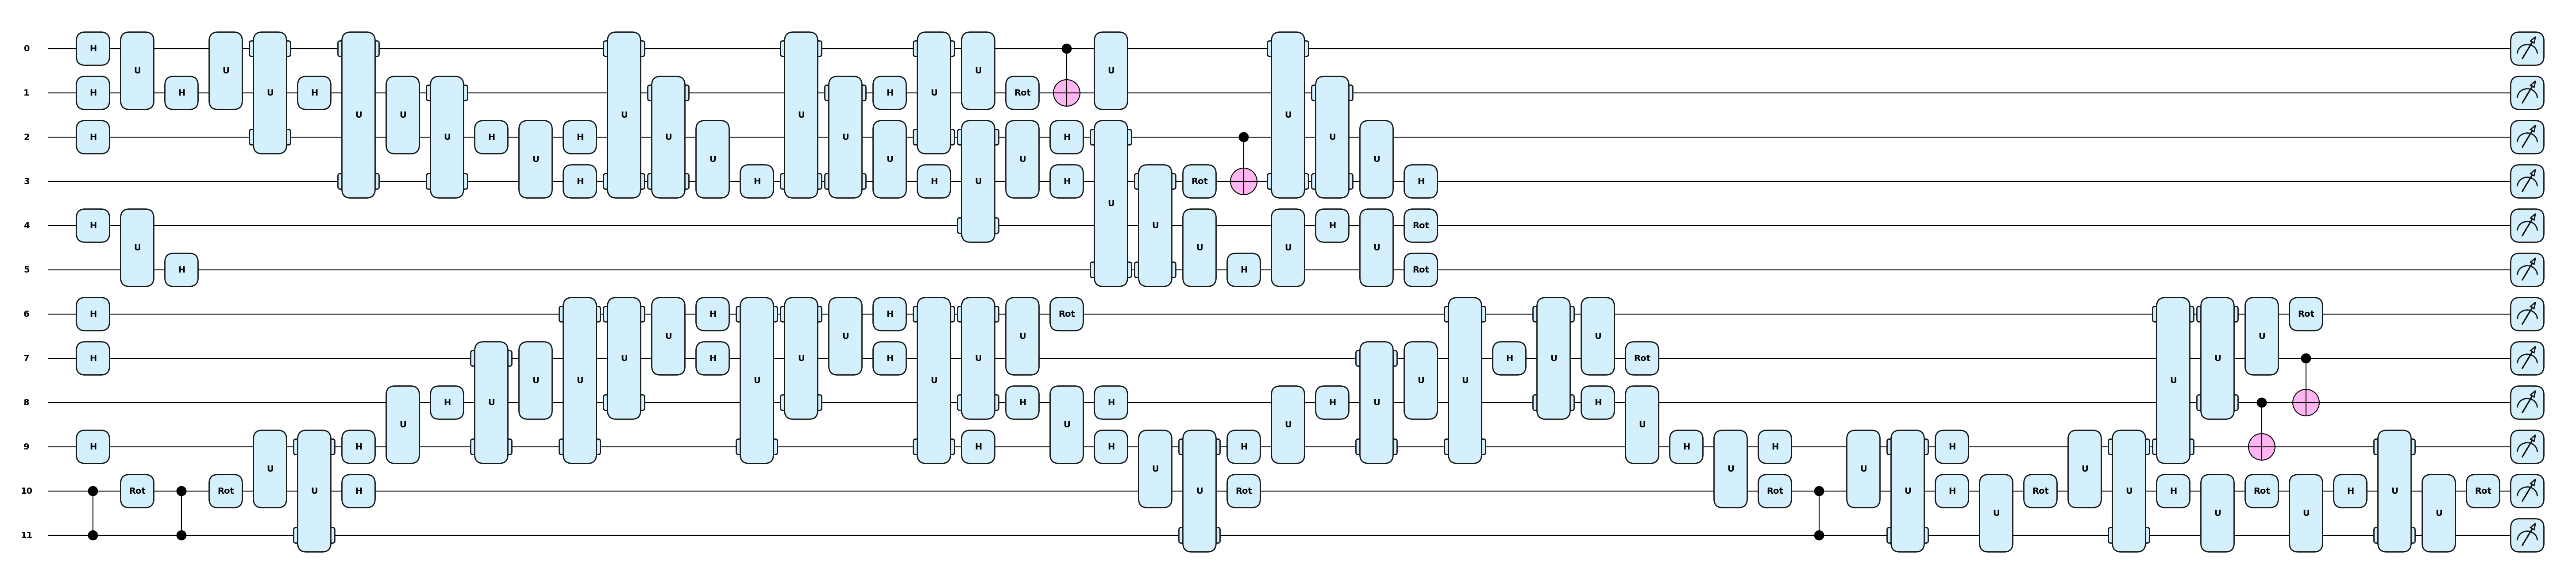

In [6]:
qnode_q3 = optimization_level_3_qiskit(qnode_q1)